<a href="https://colab.research.google.com/github/Torough/BEASTDL/blob/master/Trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and classes

In [1]:
from google.colab import drive
drive.mount('/content/gdrive'
           )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##imports

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import sklearn

import random
import keras
import sys, cv2, glob, os, time
from tqdm import tqdm
from sklearn import metrics, svm, metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from keras import backend as K
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential, Model
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, Input, BatchNormalization, Activation, Dropout

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard


from keras.layers import  MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet


from os import listdir
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import copy

Using TensorFlow backend.


##classes

In [0]:
def reset_model(model):
  model.reset_states()

In [0]:
def aug(model):
  History = model.fit_generator(train_gen,                                
                    steps_per_epoch=len(X_train) / 32, validation_data = val_datagen, 
                    validation_steps=32, epochs=30)
  return History

In [0]:
def no_aug(model):
  History = model.fit( X_train,y_train, validation_split=0.3, epochs=30)
  
  return History

In [0]:
def plot_confusion_matrix(classifier):
  predictions = classifier.predict(X_test)
  
  matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)) 
  return sns.heatmap(matrix,annot=True,fmt='.5g')

In [0]:
def scores(classifier):
  predictions = classifier.predict(X_test)
  
  test_score = classifier.evaluate(X_test, y_test)
  print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))
  
  print('=========================================================================================')
  
  print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1))))
  
  print('=========================================================================================')
  
  matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
  #print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))
  print(matrix)

In [0]:
def graph(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

##Data


In [9]:
listdir("/content/gdrive/My Drive/project/BEAST1/Anger/")

DATADIR = "/content/gdrive/My Drive/project/BEAST1/"

CATEGORIES = ["Anger", "Fear", "Happy", "Sad"]


training_data = []

def create_training_data():
    for category in CATEGORIES:  # 

        path = os.path.join(DATADIR,category)  # create path to Emotion categories
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            
                #img_array = cv2.imread(os.path.join(path,img)) 
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (224, 224))  # resize to normalize data size
                #new_array = cv2.resize(img_array, (138, 310))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                random.shuffle(training_data)
           
          
          
create_training_data()
print(len(training_data))

100%|██████████| 62/62 [00:19<00:00,  3.27it/s]

254


In [0]:
Features = []
y = []

for features,label in training_data:
    Features.append(features)
    y.append(label)
    
    
#Resizing Image Data
X = np.array(Features).reshape(-3, 224, 224, 3)
#one Hot Encoding
y = to_categorical(y)  

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

##train Gen

In [0]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_gen = datagen.flow(
    x=X_train, y=y_train,
    subset='training',
    #class_mode = 'categorical'
    
                        )
 
val_datagen = datagen.flow(
    x=X_train, y=y_train,
    subset='validation',
    #class_mode = 'categorical'
                        )
   
datagen.fit(X_train)

#Base Model

In [0]:
#Instantiating Keras Sequential Object
model = keras.models.Sequential() 
#Convolutional Layer
model.add(keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3))) 
#Batch Normalization
model.add(keras.layers.BatchNormalization()) 
#Relu Activation Layer
model.add(keras.layers.LeakyReLU(alpha=0.3)) 
#Flatten layer
model.add(keras.layers.Flatten()) 
#fully connected layer
model.add(keras.layers.Dense(4, activation='sigmoid')) 

opt = keras.optimizers.Adam(0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
base_aug = aug(model)

Epoch 1/30
6/5 [==============================] - 10s 2s/step - loss: 3.7824 - acc: 0.2702 - val_loss: 6.8646 - val_acc: 0.1974
Epoch 2/30
6/5 [==============================] - 8s 1s/step - loss: 4.7706 - acc: 0.3034 - val_loss: 6.8760 - val_acc: 0.1924
Epoch 3/30
6/5 [==============================] - 8s 1s/step - loss: 5.0800 - acc: 0.2597 - val_loss: 6.7783 - val_acc: 0.1826
Epoch 4/30
6/5 [==============================] - 8s 1s/step - loss: 4.4466 - acc: 0.2785 - val_loss: 6.7156 - val_acc: 0.1875
Epoch 5/30
6/5 [==============================] - 8s 1s/step - loss: 4.3593 - acc: 0.2343 - val_loss: 6.8646 - val_acc: 0.1826
Epoch 6/30
6/5 [==============================] - 8s 1s/step - loss: 4.7288 - acc: 0.2964 - val_loss: 6.9566 - val_acc: 0.1826
Epoch 7/30
6/5 [==============================] - 8s 1s/step - loss: 4.7562 - acc: 0.2794 - val_loss: 7.2821 - val_acc: 0.1891
Epoch 8/30
6/5 [==============================] - 8s 1s/step - loss: 5.3114 - acc: 0.2687 - val_loss: 7.1416 -

64/64 [==============================] - 0s 3ms/step
Test loss 4.6188, accuracy 25.00%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bdb8e99e8>:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        16
           1       0.27      1.00      0.42        17
           2       0.00      0.00      0.00        15
           3       0.25      1.00      0.40        16

   micro avg       0.26      0.77      0.38        64
   macro avg       0.19      0.75      0.30        64
weighted avg       0.20      0.77      0.31        64
 samples avg       0.26      0.77      0.38        64


[[16  0  0  0]
 [17  0  0  0]
 [15  0  0  0]
 [16  0  0  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


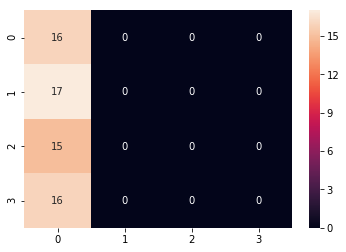

In [0]:
plot_confusion_matrix(model)
scores(model)

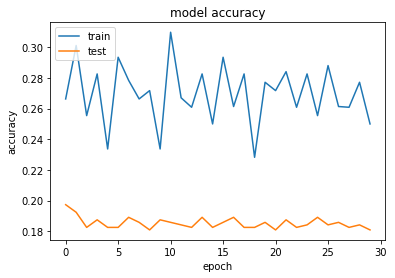

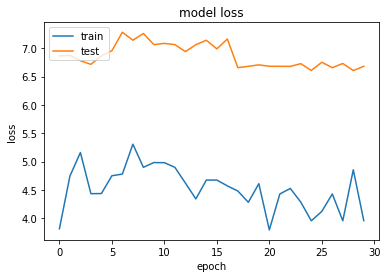

In [0]:
graph(base_aug)

In [0]:
#reset
model.reset_states()

In [0]:
base = no_aug(model)

Train on 133 samples, validate on 57 samples
Epoch 1/30
133/133 [==============================] - 2s 13ms/step - loss: 6.7012 - acc: 0.2180 - val_loss: 9.6234 - val_acc: 0.2807
Epoch 2/30
133/133 [==============================] - 1s 7ms/step - loss: 7.7677 - acc: 0.2556 - val_loss: 9.6234 - val_acc: 0.2807
Epoch 3/30
133/133 [==============================] - 1s 7ms/step - loss: 7.7677 - acc: 0.2556 - val_loss: 9.6234 - val_acc: 0.2807
Epoch 4/30
133/133 [==============================] - 1s 7ms/step - loss: 7.7677 - acc: 0.2556 - val_loss: 9.6234 - val_acc: 0.2807
Epoch 5/30
133/133 [==============================] - 1s 7ms/step - loss: 7.7677 - acc: 0.2556 - val_loss: 9.6234 - val_acc: 0.2807
Epoch 6/30
133/133 [==============================] - 1s 7ms/step - loss: 7.7677 - acc: 0.2556 - val_loss: 9.6234 - val_acc: 0.2807
Epoch 7/30
133/133 [==============================] - 1s 6ms/step - loss: 7.7677 - acc: 0.2556 - val_loss: 9.6234 - val_acc: 0.2807
Epoch 8/30
133/133 [==========

64/64 [==============================] - 0s 2ms/step
Test loss 8.4056, accuracy 26.56%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bdaec4f60>:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.27      1.00      0.42        17
           2       0.23      1.00      0.38        15
           3       0.00      0.00      0.00        16

   micro avg       0.25      0.50      0.33        64
   macro avg       0.12      0.50      0.20        64
weighted avg       0.13      0.50      0.20        64
 samples avg       0.25      0.50      0.33        64


[[ 0 16  0  0]
 [ 0 17  0  0]
 [ 0 15  0  0]
 [ 0 16  0  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


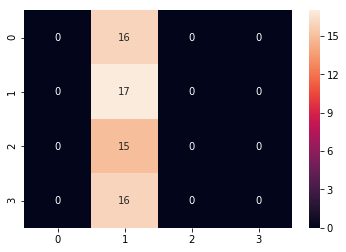

In [0]:
plot_confusion_matrix(model)
scores(model)

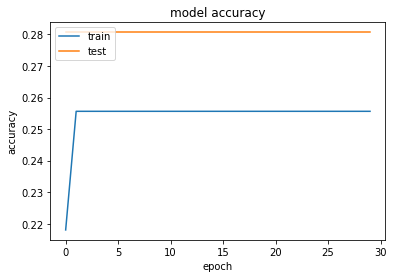

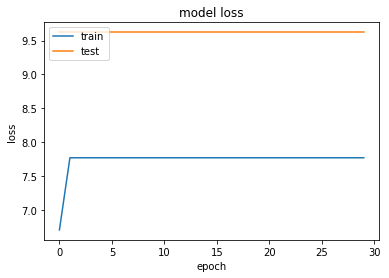

In [0]:
graph(base)

#Lecun

In [0]:
#Lecun LeNet Model
#Instantiate an empty model

lecun = Sequential()

# C1 Convolutional Layer
lecun.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(224, 224, 3)))

# S2 Pooling Layer
lecun.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
lecun.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
lecun.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
lecun.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
lecun.add(layers.Flatten())

# FC6 Fully Connected Layer
lecun.add(layers.Dense(84, activation='relu'))

#Output Layer with softmax activation
lecun.add(layers.Dense(4, activation='softmax'))

# Compile the model
lecun.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [0]:
lecun_aug = aug(lecun)

Epoch 1/30
6/5 [==============================] - 13s 2s/step - loss: 1.4161 - acc: 0.2650 - val_loss: 1.3758 - val_acc: 0.3849
Epoch 2/30
6/5 [==============================] - 8s 1s/step - loss: 1.3792 - acc: 0.2462 - val_loss: 1.3833 - val_acc: 0.2862
Epoch 3/30
6/5 [==============================] - 8s 1s/step - loss: 1.3591 - acc: 0.2807 - val_loss: 1.3623 - val_acc: 0.3322
Epoch 4/30
6/5 [==============================] - 8s 1s/step - loss: 1.3632 - acc: 0.2837 - val_loss: 1.4479 - val_acc: 0.1711
Epoch 5/30
6/5 [==============================] - 8s 1s/step - loss: 1.3610 - acc: 0.2942 - val_loss: 1.4167 - val_acc: 0.1875
Epoch 6/30
6/5 [==============================] - 8s 1s/step - loss: 1.3416 - acc: 0.3494 - val_loss: 1.2683 - val_acc: 0.4885
Epoch 7/30
6/5 [==============================] - 8s 1s/step - loss: 1.3365 - acc: 0.3076 - val_loss: 1.5823 - val_acc: 0.1563
Epoch 8/30
6/5 [==============================] - 8s 1s/step - loss: 1.3432 - acc: 0.3166 - val_loss: 1.3164 -

64/64 [==============================] - 0s 2ms/step
Test loss 10.6049, accuracy 28.12%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bda6ec4e0>:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        17
           2       0.30      1.00      0.46        15
           3       0.75      0.19      0.30        16

    accuracy                           0.28        64
   macro avg       0.26      0.30      0.19        64
weighted avg       0.26      0.28      0.18        64


[[ 0  2 14  0]
 [ 0  0 16  1]
 [ 0  0 15  0]
 [ 2  6  5  3]]


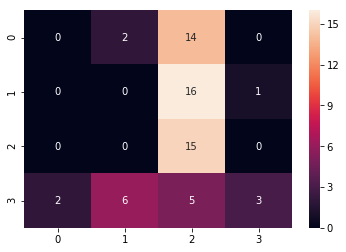

In [0]:
plot_confusion_matrix(lecun)

scores(lecun)

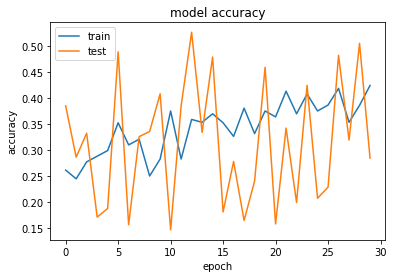

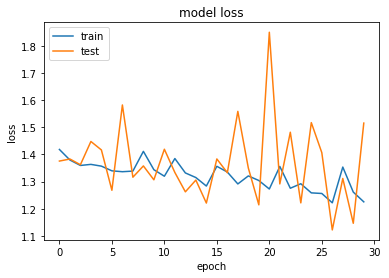

In [0]:
graph(lecun_aug)

In [0]:
reset_model(lecun)

In [0]:
lecun_base = no_aug(lecun)

Train on 133 samples, validate on 57 samples
Epoch 1/30
133/133 [==============================] - 3s 26ms/step - loss: 10.5834 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 2/30
133/133 [==============================] - 1s 11ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 3/30
133/133 [==============================] - 1s 11ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 4/30
133/133 [==============================] - 1s 11ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 5/30
133/133 [==============================] - 1s 11ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 6/30
133/133 [==============================] - 1s 11ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 7/30
133/133 [==============================] - 1s 11ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 8/30

64/64 [==============================] - 0s 2ms/step
Test loss 12.0886, accuracy 25.00%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bd9d60f60>:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        15
           3       0.25      1.00      0.40        16

    accuracy                           0.25        64
   macro avg       0.06      0.25      0.10        64
weighted avg       0.06      0.25      0.10        64


[[ 0  0  0 16]
 [ 0  0  0 17]
 [ 0  0  0 15]
 [ 0  0  0 16]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


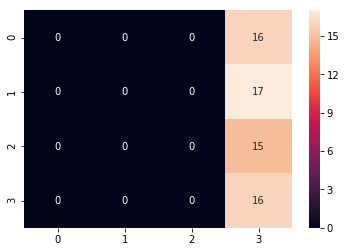

In [0]:
plot_confusion_matrix(lecun)

scores(lecun)

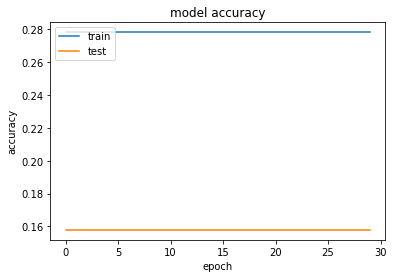

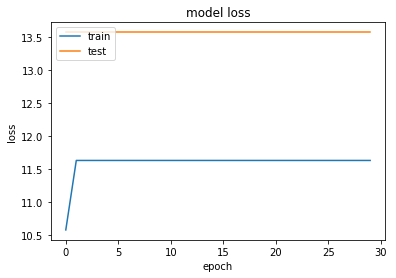

In [0]:
graph(lecun_base)

#VGG16

In [0]:
this = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in this.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in this.layers:
    print(layer, layer.trainable)
    

# Create the model
trainer = models.Sequential()
 
# Add the vgg convolutional base model
trainer.add(this)
 
# Add new layers
trainer.add(layers.Flatten())
trainer.add(layers.Dense(1024, activation='relu'))
trainer.add(layers.Dropout(0.5))
trainer.add(layers.Dense(4, activation='softmax'))



trainer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


<keras.engine.input_layer.InputLayer object at 0x7f4bc01e71d0> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc04cd908> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc01e72b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bc01e79e8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc01e7a58> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc020d908> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bc01a0748> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc01a0898> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc014fcf8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc0169828> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bc0112198> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc0178a20> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc012dac8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc0140ac8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bc00d9f60>

AttributeError: ignored

In [0]:
VGG_aug = aug(trainer)

Epoch 1/30
6/5 [==============================] - 16s 3s/step - loss: 2.5178 - acc: 0.2402 - val_loss: 1.2040 - val_acc: 0.4507
Epoch 2/30
6/5 [==============================] - 10s 2s/step - loss: 1.2839 - acc: 0.3458 - val_loss: 1.1306 - val_acc: 0.6053
Epoch 3/30
6/5 [==============================] - 10s 2s/step - loss: 1.2430 - acc: 0.4574 - val_loss: 0.9466 - val_acc: 0.5674
Epoch 4/30
6/5 [==============================] - 10s 2s/step - loss: 0.9954 - acc: 0.5599 - val_loss: 0.7063 - val_acc: 0.7122
Epoch 5/30
6/5 [==============================] - 9s 2s/step - loss: 0.8079 - acc: 0.6649 - val_loss: 0.7798 - val_acc: 0.6776
Epoch 6/30
6/5 [==============================] - 10s 2s/step - loss: 0.6577 - acc: 0.6938 - val_loss: 0.5924 - val_acc: 0.7549
Epoch 7/30
6/5 [==============================] - 9s 2s/step - loss: 0.7439 - acc: 0.7156 - val_loss: 0.6086 - val_acc: 0.7664
Epoch 8/30
6/5 [==============================] - 10s 2s/step - loss: 0.6482 - acc: 0.7649 - val_loss: 0.5

64/64 [==============================] - 1s 9ms/step
Test loss 0.6250, accuracy 95.31%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bd977fc88>:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.94      0.88      0.91        17
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        16

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.95        64
weighted avg       0.96      0.95      0.95        64


[[16  0  0  0]
 [ 2 15  0  0]
 [ 0  1 14  0]
 [ 0  0  0 16]]


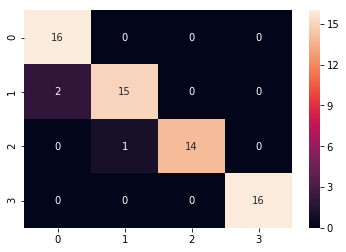

In [0]:
plot_confusion_matrix(trainer)

scores(trainer)

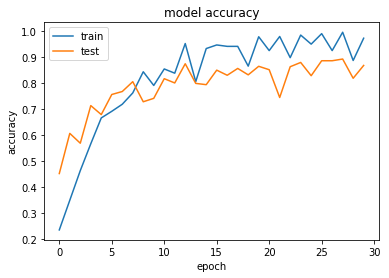

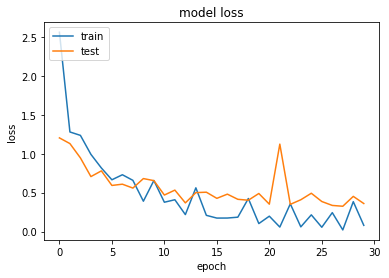

In [0]:
graph(VGG_aug)

In [0]:
reset_model(trainer)

In [0]:
VGG_naug = no_aug(trainer)

Train on 133 samples, validate on 57 samples
Epoch 1/30
133/133 [==============================] - 6s 48ms/step - loss: 9.9203 - acc: 0.3083 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 2/30
133/133 [==============================] - 2s 15ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 3/30
133/133 [==============================] - 2s 15ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 4/30
133/133 [==============================] - 2s 15ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 5/30
133/133 [==============================] - 2s 15ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 6/30
133/133 [==============================] - 2s 15ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 7/30
133/133 [==============================] - 2s 15ms/step - loss: 11.6341 - acc: 0.2782 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 8/30


64/64 [==============================] - 1s 9ms/step
Test loss 8.3109, accuracy 48.44%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bd8f937f0>:
              precision    recall  f1-score   support

           0       0.32      0.94      0.48        16
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        15
           3       0.94      1.00      0.97        16

    accuracy                           0.48        64
   macro avg       0.32      0.48      0.36        64
weighted avg       0.32      0.48      0.36        64


[[15  0  0  1]
 [17  0  0  0]
 [15  0  0  0]
 [ 0  0  0 16]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


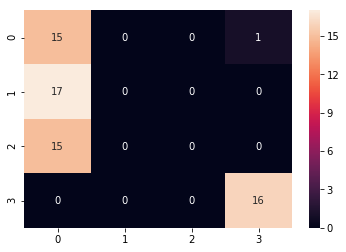

In [0]:
plot_confusion_matrix(trainer)

scores(trainer)

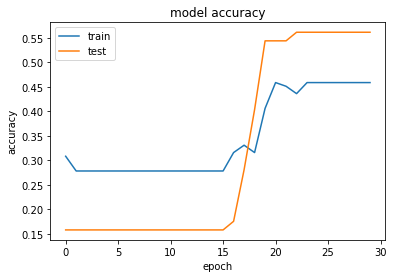

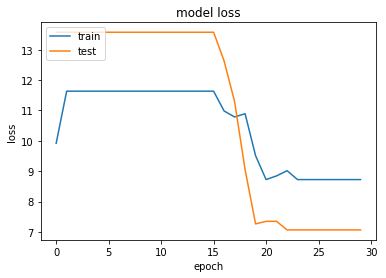

In [0]:
graph(VGG_naug)

#VGG 19

In [0]:
vgg19 = VGG19(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in vgg19.layers[:-5]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg19.layers:
    print(layer, layer.trainable)
    
    
# Create the model
trainer_nineteen = models.Sequential()
 
# Add the vgg convolutional base model
trainer_nineteen.add(vgg19)
 

  
# Add new layers
trainer_nineteen.add(layers.Flatten())
trainer_nineteen.add(layers.Dense(1024, activation='relu'))
trainer_nineteen.add(layers.Dropout(0.5))
trainer_nineteen.add(layers.Dense(4, activation='softmax'))


trainer_nineteen.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

<keras.engine.input_layer.InputLayer object at 0x7f4bd4c82390> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4c823c8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4c82e48> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bd4c47ba8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4c475f8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4be2a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bd4bf5c88> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4bf52e8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4ba27b8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4bbaa90> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4bcc588> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bd4b64be0> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4b7e240> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4b28198> False
<keras.layers.convolutional.Conv2D object at 0x7f4bd4b28a58>

In [0]:
Vgg19_aug = aug(trainer_nineteen)

Epoch 1/30
6/5 [==============================] - 13s 2s/step - loss: 2.4907 - acc: 0.2523 - val_loss: 1.3917 - val_acc: 0.2895
Epoch 2/30
6/5 [==============================] - 10s 2s/step - loss: 1.3850 - acc: 0.2844 - val_loss: 1.3702 - val_acc: 0.3421
Epoch 3/30
6/5 [==============================] - 10s 2s/step - loss: 1.2339 - acc: 0.4738 - val_loss: 1.1256 - val_acc: 0.4901
Epoch 4/30
6/5 [==============================] - 10s 2s/step - loss: 1.2636 - acc: 0.4172 - val_loss: 1.0916 - val_acc: 0.4622
Epoch 5/30
6/5 [==============================] - 10s 2s/step - loss: 1.0767 - acc: 0.5052 - val_loss: 0.8937 - val_acc: 0.5345
Epoch 6/30
6/5 [==============================] - 10s 2s/step - loss: 0.8643 - acc: 0.5652 - val_loss: 0.8362 - val_acc: 0.5806
Epoch 7/30
6/5 [==============================] - 10s 2s/step - loss: 0.8623 - acc: 0.6227 - val_loss: 0.6623 - val_acc: 0.7056
Epoch 8/30
6/5 [==============================] - 10s 2s/step - loss: 0.8085 - acc: 0.6347 - val_loss: 0

64/64 [==============================] - 1s 10ms/step
Test loss 1.7703, accuracy 89.06%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bd7c00358>:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       0.93      0.76      0.84        17
           2       0.92      0.80      0.86        15
           3       1.00      1.00      1.00        16

    accuracy                           0.89        64
   macro avg       0.90      0.89      0.89        64
weighted avg       0.90      0.89      0.89        64


[[16  0  0  0]
 [ 3 13  1  0]
 [ 2  1 12  0]
 [ 0  0  0 16]]


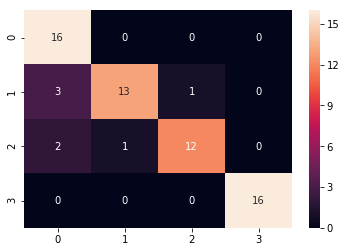

In [0]:
plot_confusion_matrix(trainer_nineteen)

scores(trainer_nineteen)

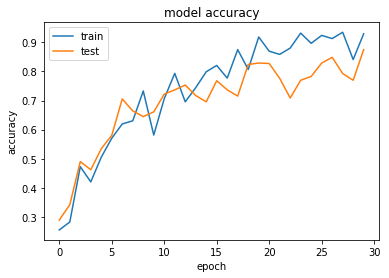

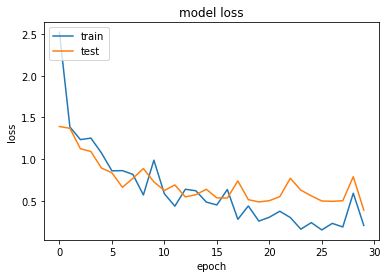

In [0]:
graph(Vgg19_aug)

In [0]:
reset_model(trainer_nineteen)

In [0]:
Vgg19_noaug = no_aug(trainer_nineteen)

Train on 133 samples, validate on 57 samples
Epoch 1/30
133/133 [==============================] - 4s 29ms/step - loss: 7.7927 - acc: 0.3008 - val_loss: 2.7522 - val_acc: 0.3333
Epoch 2/30
133/133 [==============================] - 2s 18ms/step - loss: 1.7068 - acc: 0.5188 - val_loss: 1.1312 - val_acc: 0.5263
Epoch 3/30
133/133 [==============================] - 2s 18ms/step - loss: 0.5913 - acc: 0.8045 - val_loss: 1.5454 - val_acc: 0.5088
Epoch 4/30
133/133 [==============================] - 2s 18ms/step - loss: 0.4166 - acc: 0.8797 - val_loss: 1.2154 - val_acc: 0.5439
Epoch 5/30
133/133 [==============================] - 2s 18ms/step - loss: 0.2859 - acc: 0.8872 - val_loss: 1.2537 - val_acc: 0.6140
Epoch 6/30
133/133 [==============================] - 2s 18ms/step - loss: 0.4971 - acc: 0.8722 - val_loss: 1.0093 - val_acc: 0.5614
Epoch 7/30
133/133 [==============================] - 2s 18ms/step - loss: 0.4448 - acc: 0.8947 - val_loss: 1.4087 - val_acc: 0.6842
Epoch 8/30
133/133 [====

64/64 [==============================] - 1s 10ms/step
Test loss 0.5033, accuracy 85.94%
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f4bd4c82358>:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.83      0.88      0.86        17
           2       0.88      0.93      0.90        15
           3       0.89      1.00      0.94        16

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.85        64
weighted avg       0.86      0.86      0.85        64


[[10  3  2  1]
 [ 2 15  0  0]
 [ 0  0 14  1]
 [ 0  0  0 16]]


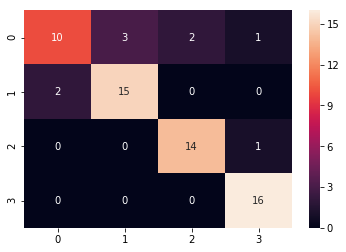

In [0]:
plot_confusion_matrix(trainer_nineteen)

scores(trainer_nineteen)

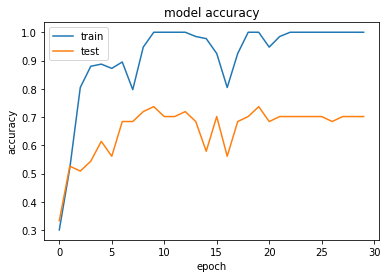

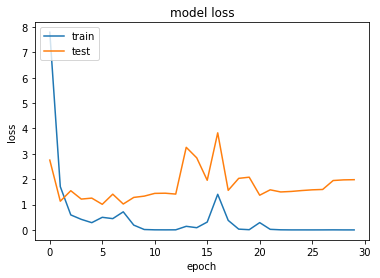

In [0]:
graph(Vgg19_noaug)

# Resnet50

In [0]:
ResNet50 = ResNet50(weights='imagenet',include_top=False, input_shape=(224,224, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
for layers in ResNet50.layers:
  layer.trainable = False
  
  
x = ResNet50.output
x = GlobalAveragePooling2D(data_format='channels_last')(x)
x = Dense(4, activation = 'softmax')(x)

Updated = Model(ResNet50.input,x)

Updated.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



In [0]:
Res_aug = aug(Updated)

Epoch 1/30
6/5 [==============================] - 26s 4s/step - loss: 0.9686 - acc: 0.6363 - val_loss: 0.6088 - val_acc: 0.7549
Epoch 2/30
6/5 [==============================] - 12s 2s/step - loss: 0.3477 - acc: 0.8907 - val_loss: 0.6010 - val_acc: 0.7664
Epoch 3/30
6/5 [==============================] - 11s 2s/step - loss: 0.2349 - acc: 0.9111 - val_loss: 0.4139 - val_acc: 0.8388
Epoch 4/30
6/5 [==============================] - 12s 2s/step - loss: 0.0935 - acc: 0.9813 - val_loss: 0.4483 - val_acc: 0.8322
Epoch 5/30
6/5 [==============================] - 12s 2s/step - loss: 0.1466 - acc: 0.9446 - val_loss: 0.5987 - val_acc: 0.8224
Epoch 6/30
6/5 [==============================] - 12s 2s/step - loss: 0.1141 - acc: 0.9589 - val_loss: 0.5248 - val_acc: 0.8125
Epoch 7/30
6/5 [==============================] - 12s 2s/step - loss: 0.0492 - acc: 0.9865 - val_loss: 0.6376 - val_acc: 0.8174
Epoch 8/30
6/5 [==============================] - 11s 2s/step - loss: 0.0824 - acc: 0.9563 - val_loss: 0

64/64 [==============================] - 1s 9ms/step
Test loss 12.0886, accuracy 25.00%
Classification report for classifier <keras.engine.training.Model object at 0x7f4bcd59f320>:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        15
           3       0.25      1.00      0.40        16

    accuracy                           0.25        64
   macro avg       0.06      0.25      0.10        64
weighted avg       0.06      0.25      0.10        64


[[ 0  0  0 16]
 [ 0  0  0 17]
 [ 0  0  0 15]
 [ 0  0  0 16]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


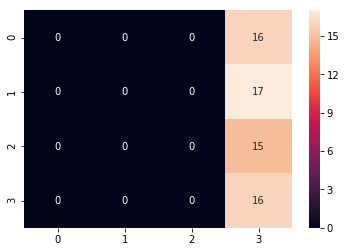

In [0]:
plot_confusion_matrix(Updated)

scores(Updated)

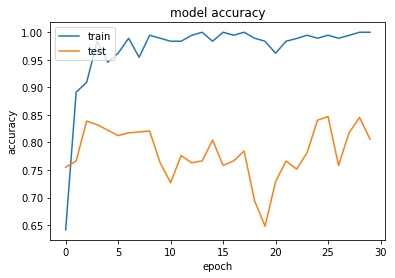

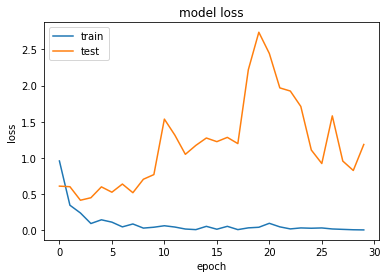

In [0]:
graph(Res_aug)

In [0]:
reset_model(Updated)

In [0]:
Res_naug = no_aug(Updated)

Train on 133 samples, validate on 57 samples
Epoch 1/30
133/133 [==============================] - 15s 115ms/step - loss: 1.1142 - acc: 0.5714 - val_loss: 1.8738 - val_acc: 0.3333
Epoch 2/30
133/133 [==============================] - 4s 32ms/step - loss: 0.1263 - acc: 0.9699 - val_loss: 0.8957 - val_acc: 0.6667
Epoch 3/30
133/133 [==============================] - 4s 32ms/step - loss: 0.0310 - acc: 1.0000 - val_loss: 0.7306 - val_acc: 0.6842
Epoch 4/30
133/133 [==============================] - 4s 31ms/step - loss: 0.0244 - acc: 0.9925 - val_loss: 0.9706 - val_acc: 0.5439
Epoch 5/30
133/133 [==============================] - 4s 32ms/step - loss: 0.0232 - acc: 1.0000 - val_loss: 0.8559 - val_acc: 0.5965
Epoch 6/30
133/133 [==============================] - 4s 32ms/step - loss: 0.0179 - acc: 1.0000 - val_loss: 1.6728 - val_acc: 0.4561
Epoch 7/30
133/133 [==============================] - 4s 32ms/step - loss: 0.0197 - acc: 0.9925 - val_loss: 1.5682 - val_acc: 0.4737
Epoch 8/30
133/133 [==

64/64 [==============================] - 1s 9ms/step
Test loss 0.9245, accuracy 75.00%
Classification report for classifier <keras.engine.training.Model object at 0x7f4bc6318be0>:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.62      0.94      0.74        17
           2       0.75      1.00      0.86        15
           3       0.94      1.00      0.97        16

    accuracy                           0.75        64
   macro avg       0.83      0.75      0.67        64
weighted avg       0.82      0.75      0.67        64


[[ 1 10  4  1]
 [ 0 16  1  0]
 [ 0  0 15  0]
 [ 0  0  0 16]]


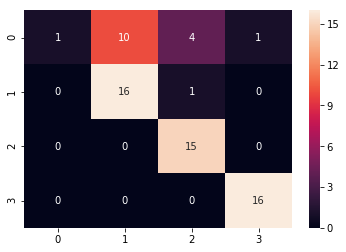

In [0]:
plot_confusion_matrix(Updated)

scores(Updated)

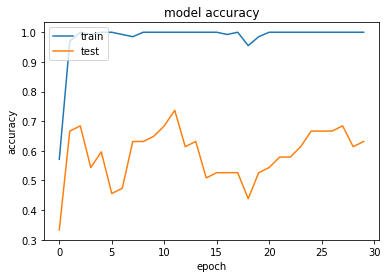

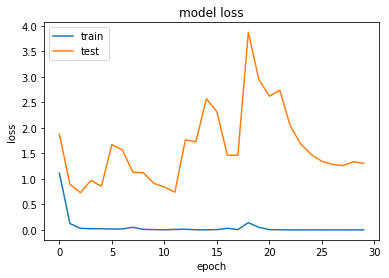

In [0]:
graph(Res_naug)

In [0]:
img_shape = (224,224,3)
Mobilenet = keras.applications.mobilenet.MobileNet()

In [0]:
Mobilenet.summary()

In [28]:

from keras import Model
x = Mobilenet.layers[-5].output
predictions = Dense(4, activation = 'softmax')(x)
model = Model(inputs = Mobilenet.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [0]:
model.summary()

In [0]:
#for layer in model.layers[:-5]:
#  layer.trainable = False

In [0]:
mobile_aug = aug(model)

#Skeleton

In [0]:
protoFile =    "/content/gdrive/My Drive/project/openpose-master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile =  "/content/gdrive/My Drive/project/openpose-master/pose_iter_160000.caffemodel"
 
# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [0]:
listdir("/content/gdrive/My Drive/project/BEASTskeleton/Anger/")

DATADIR = "/content/gdrive/My Drive/project/BEASTskeleton/"
skeleton_data = []
inWidth = 138
inHeight = 310 

def create_skeleton_data():
    for category in CATEGORIES:  # 

        path = os.path.join(DATADIR,category)  # create path to Emotion categories
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            
                #img_array = cv2.imread(os.path.join(path,img)) 
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (138, 310))  # resize to normalize data size
                #new_array = cv2.resize(img_array, (138, 310))  # resize to normalize data size
                
                          
                
                # Read image
                frame = new_array

                # Specify the input image dimensions

                frameCopy = np.copy(frame)
                frameWidth = frame.shape[1]
                frameHeight = frame.shape[0]
                threshold = 0.1

                # Prepare the frame to be fed to the network
                inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

                # Set the prepared object as the input blob of the network
                net.setInput(inpBlob)


                output = net.forward()              
                H = output.shape[2]
                W = output.shape[3]
                # Empty list to store the detected keypoints
                points = []
                for i in range(15):
                    # confidence map of corresponding body's part.
                    probMap = output[0, i, :, :]

                    # Find global maxima of the probMap.
                    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

                    # Scale the point to fit on the original image
                    x = (frameWidth * point[0]) / W
                    y = (frameHeight * point[1]) / H

                    if prob > threshold :
                        cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
                        #cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 3, lineType=cv2.LINE_AA)

                        # Add the point to the list if the probability is greater than the threshold
                        points.append((int(x), int(y)))
                    else :
                        points.append(None)


                POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

                for pair in POSE_PAIRS:
                    partA = pair[0]
                    partB = pair[1]

                    if points[partA] and points[partB]:
                        cv2.line(frameCopy, points[partA], points[partB], (0, 255, 0), 3)

            
                
                skeleton_data.append([frameCopy, class_num])  # add this to our training_data
            #except Exception as e:  # in the interest in keeping the output clean...
            #   pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_skeleton_data()

#print(len(training_data))


100%|██████████| 62/62 [02:22<00:00,  2.29s/it]


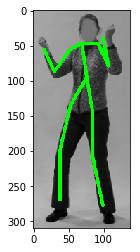

In [0]:
plt.imshow(skeleton_data[0][0])

In [0]:
X = []
Y = []

for features,label in skeleton_data:
    X.append(features)
    Y.append(label)

In [0]:
that = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in that.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in that.layers:
    print(layer, layer.trainable)
    

# Create the model
pose = models.Sequential()
 
# Add the vgg convolutional base model
pose.add(that)
 
# Add new layers
pose.add(layers.Flatten())
pose.add(layers.Dense(1024, activation='relu'))
pose.add(layers.Dropout(0.5))
pose.add(layers.Dense(4, activation='softmax'))



pose.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


<keras.engine.input_layer.InputLayer object at 0x7f4bbff77908> False
<keras.layers.convolutional.Conv2D object at 0x7f4bc000b080> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbff779e8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bbff7dac8> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbff7d0f0> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbff265f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bbff40da0> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbff40d68> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbfeeb400> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbfeebc88> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bbfe9dc50> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbfe9d2b0> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbfec9780> False
<keras.layers.convolutional.Conv2D object at 0x7f4bbfe62a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4bbfe75630>

AttributeError: ignored

In [0]:
type(pose)

keras.engine.sequential.Sequential